## Nb to establish expert level human performance on classifying YNet yeast data.



### -- Dataset: v5

In [306]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [303]:
import os
from pathlib import Path
import skimage.external.tifffile as tiff
from common import Statistics, dataset_source
from resources.conv_learner import *
from resources.plots import *
%matplotlib inline

In [296]:
PATH = "datasets/yeast_v5/"
data_path = Path(PATH)

In [297]:
CLASSES = ('WT', 'mfb1KO', 'mmr1KO', 'mmm1KO','mfb1KO_mmr1KO', 'num1KO' )
NUM_CLASSES = len(CLASSES)
BATCH_SIZE = 64
SIZE = 200

In [300]:
stats_name = "yeast_v5_per_class.dict"
classes = Statistics.source_class(data_path)

train_val = zip(classes['train'], classes['val'])
main_stats = Statistics.per_class(train_val, save_name=stats_name)


working on: mfb1KO
working on: mfb1KO
working on: mfb1KO_mmr1KO
working on: mfb1KO_mmr1KO
working on: mmm1KO
working on: mmm1KO
working on: mmr1KO
working on: mmr1KO
working on: num1KO
working on: num1KO
working on: WT
working on: WT


In [308]:
def get_data(path: str, sz, bs):
    global lbl2index
    create, lbl2index, test_lbl2index = ImageClassifierData.prepare_from_path(path, val_name='val', bs=bs)
    main_stats_X = {lbl2index[key]: val for key, val in main_stats.items()}
    tfms = tfms_from_stats(main_stats_X, sz, aug_tfms=[RandomDihedral()], pad=sz//8)
    
    print('\n class to index mapping:\n',lbl2index)
    return create(tfms)

In [309]:
data = get_data(PATH,SIZE, BATCH_SIZE)


 class to index mapping:
 {'WT': 0, 'mfb1KO': 1, 'mfb1KO_mmr1KO': 2, 'mmm1KO': 3, 'mmr1KO': 4, 'num1KO': 5}


In [269]:
def on_button_clicked(pred):
    
    # converting to str and parsing to get description of the button clicked.
    _, cls, _ = str(pred).split("'")
    
    global idx
    global x
    global y
    global targs
    global preds
    global clss
    
    
    clear_output()
    
    for c in clss:
        buttons = widgets.Button(description=c)
        buttons.on_click(on_button_clicked)
        display(buttons)

    preds.append(lbl2index[cls])
    targs.append(y[idx])
    
#     print(preds, targs)
#     print(len(preds))
    
    if idx == (BATCH_SIZE - 1):
        print('new Batch!')
        idx = 0
        x, y = next(iter(data.trn_dl)) 
        xx = x[idx].cpu().numpy().copy()
        plt.imshow(np.sum(xx, axis=0))
        
    else:
        idx = idx + 1
        # loading it from GPU to CPU
        xx = x[idx].cpu().numpy().copy()
        yy = y[idx]
        plt.imshow(np.sum(xx, axis=0))
        
        
    evaluate(preds, targs)

In [266]:
def evaluate(a, b):
    print(f"human-level accuracy: [{sum((np.asarray(preds)) == (np.asarray(targs))) / len(preds):4.4}]")
    

In [229]:
x, y = next(iter(data.trn_dl))


In [270]:
def manual_preds(loaded_preds = None, loaded_targs = None):    
    
    from IPython.display import clear_output
    
    global idx
    global preds
    global targs
    global clss
    
    
    if loaded_preds is not None and loaded_targs is not None:
        preds = loaded_preds
        targs = loaded_targs
        print(evaluate(preds, targs))
        print("continuing with new batch")
    else:
        preds = []
        targs = []
        print("no previous results loaded - fresh start")
        
    idx = 0
    clss = list(lbl2index.keys())
    clss.append('Exit')

    # creating buttons
    for c in clss:
        buttons = widgets.Button(description=c)
        buttons.on_click(on_button_clicked)
        display(buttons)
    
    # load first image:
    xx = x[idx].cpu().numpy().copy()
    yy = y[idx]
    plt.imshow(np.sum(xx, axis=0))

Button(description='WT', style=ButtonStyle())

Button(description='mfb1KO', style=ButtonStyle())

Button(description='mfb1KO_mmr1KO', style=ButtonStyle())

Button(description='mmm1KO', style=ButtonStyle())

Button(description='mmr1KO', style=ButtonStyle())

Button(description='num1KO', style=ButtonStyle())

Button(description='Exit', style=ButtonStyle())

human-level accuracy: [0.5846]


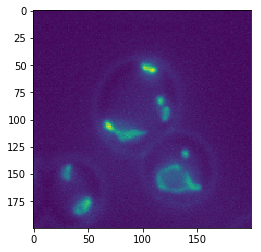

In [271]:
manual_preds()    

In [222]:
sum((np.asarray(preds)) == (np.asarray(targs))) / len(preds)

0.5625

In [272]:
print(len(preds), len(targs))

130 130


In [273]:
preds_batch_1 = preds
targs_batch_1 = targs

In [274]:
evaluate(preds_batch_1, targs_batch_1)

human-level accuracy: [0.5846]
